# Problem 5

In [25]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

## Generate threshold data

In [26]:
size = 1000
thr = .5

# Generate data
x = np.random.uniform(0, 1, (size,1))
y = np.ones(size)
y[x[:,0] < thr] = 0.

/var/folders/k0/21yc9wv13vs841ytt4r8yxyr0000gn/T/ipykernel_68088/1996924159.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, cmap='RdBu')


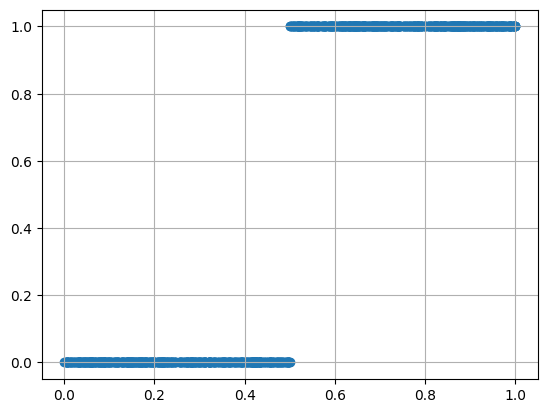

In [27]:
plt.figure()
plt.scatter(x,y, cmap='RdBu')
plt.grid()
plt.show()

In [28]:
# Test data
x_pred = np.sort(np.random.uniform(-.5, 1.5, (10000,1)), axis=0)

In [29]:
# Problem 5a
from sklearn.linear_model import LinearRegression

# TODO: train linear regression on x,y
linear = LinearRegression()
linear.fit(x, y)


# TODO: get predictions on x_pred
pred_linear = linear.predict(x_pred)
print("Prediction: ",pred_linear,sep='\n')


Prediction: 
[-0.97568057 -0.97555052 -0.97552129 ...  1.98132798  1.98134637
  1.98147408]


In [30]:
# Problem 5b
from sklearn.linear_model import LogisticRegression

# TODO: train logistic regression on x,y
logistic = LogisticRegression()
logistic.fit(x,y)

# TODO: get predictions on x_pred (hint: use logistic.predict_proba()[:,1])
pred_logistic = logistic.predict_proba(x_pred)[:,1]
print("Predictions: ",pred_logistic)


Predictions:  [9.28323511e-06 9.29271973e-06 9.29485225e-06 ... 9.99991112e-01
 9.99991113e-01 9.99991122e-01]


/var/folders/k0/21yc9wv13vs841ytt4r8yxyr0000gn/T/ipykernel_68088/1388275027.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, cmap='RdBu', label='Training data')


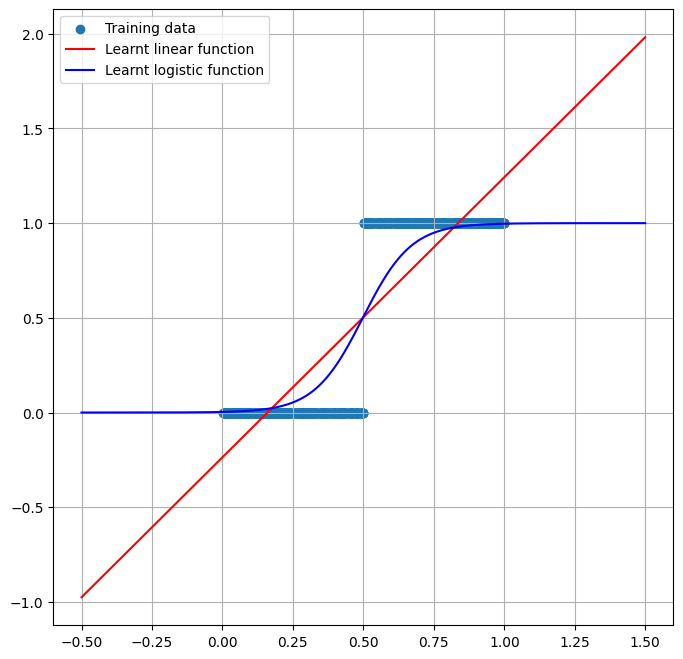

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(x,y, cmap='RdBu', label='Training data')
plt.plot(x_pred, pred_linear, c='r', label='Learnt linear function')
plt.plot(x_pred, pred_logistic, c='b', label='Learnt logistic function')
plt.legend()
plt.grid()
plt.show()

In [33]:
# Problem 5c

from sklearn.metrics import log_loss

#pred_linear = np.round(pred_linear)
#np.round(pred_logistic)
#x_pred=x_pred.astype('int')
#y=y.astype('int')
#should be computed on the training data

# TODO: compute binary cross entropy loss for linear and logistic models on training data 
bce_linear = log_loss(y,linear.predict(x))
bce_logistic = log_loss(y,logistic.predict_proba(x)[:,1])

print("Binary cross entropy loss for linear model: ", bce_linear)
print("Binary cross entropy loss for logistic model: ", bce_logistic)


Binary cross entropy loss for linear model:  0.1948875222403583
Binary cross entropy loss for logistic model:  0.13156026339996674


## Generate Linear Data

In [34]:
size = 1000
m = 1
b = 0

# Generate data
x = np.random.uniform(0, 1, (size,1))
y = m*x + b

/var/folders/k0/21yc9wv13vs841ytt4r8yxyr0000gn/T/ipykernel_68088/1996924159.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, cmap='RdBu')


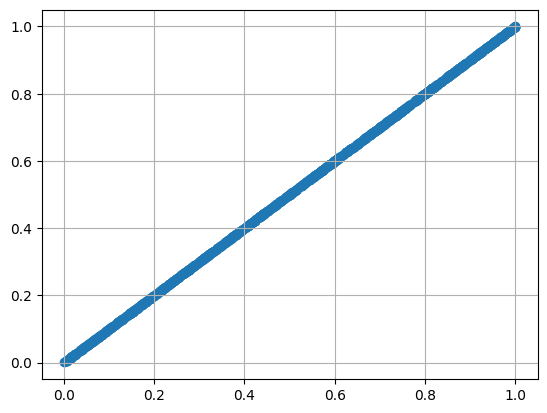

In [35]:
plt.figure()
plt.scatter(x,y, cmap='RdBu')
plt.grid()
plt.show()

In [36]:
# Problem 5d

# TODO: Train a linear regression model on x,y
linear = LinearRegression()
linear.fit(x,y)


# TODO: predict on x_pred
pred_linear = linear.predict(x_pred)
print(pred_linear)


[[-0.49996212]
 [-0.49987417]
 [-0.49985441]
 ...
 [ 1.49959561]
 [ 1.49960804]
 [ 1.4996944 ]]


[[0.00225872]
 [0.00225993]
 [0.0022602 ]
 ...
 [0.9977677 ]
 [0.99776787]
 [0.99776904]]


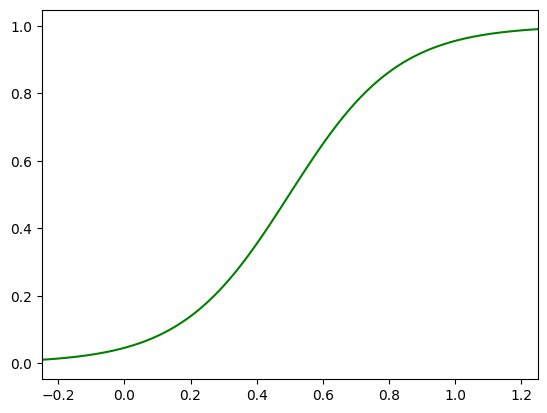

In [37]:
# Problem 5e

# Since sklearn logistic regression does not support continuous labels, we have to do this part indirectly, 
# by doing the following:
# 1) create new_y such that y = sigmoid(new_y) i.e. invert the sigmoid function 
# 2) fit a linear regression model using x, new_y and recover alpha and beta
# 3) apply a sigmoid function to the output to recover probrobabilities

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

# TODO: Invert sigmoid function on y 

new_y = np.log(y /(1 - y) )

# TODO: Train a linear regression model on x, new_y
linear_reg = LinearRegression()
linear_reg.fit(x,new_y)

alpha, beta = linear_reg.intercept_, linear_reg.coef_[0]
logistic = alpha + beta*x_pred

#applying sigmoid function to the output
# TODO: Predict probabilities on x_pred
#pred_logistic = 1 / (1 + np.exp(-linear_reg.predict(x_pred)))
pred_logistic = 1 / (1 + (np.exp(-logistic)))
print(pred_logistic)
#plt.scatter(x,new_y)
plt.plot(x_pred,pred_logistic, color='g')
plt.xlim(-0.25,1.25)
#plt.ylim(-1,1)
plt.show()

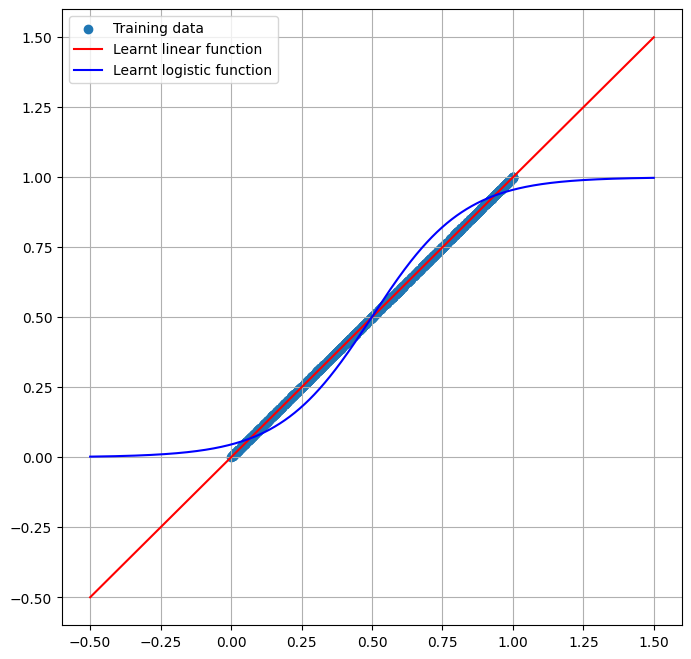

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(x,y, label='Training data')
plt.plot(x_pred, pred_linear, c='r', label='Learnt linear function')
plt.plot(x_pred, pred_logistic, c='b', label='Learnt logistic function')
plt.legend()
plt.grid()
plt.show()

In [40]:
# Problem 5f

# TODO: compute rMSE loss for linear and logistic models on training data 
from sklearn.metrics import mean_squared_error
rmse_linear = np.sqrt(mean_squared_error(y,linear.predict(x)))
logistic = alpha + beta*x
pred_logistic = 1 / (1 + (np.exp(-logistic)))
rmse_logistic = np.sqrt(mean_squared_error(y,pred_logistic))
print(rmse_linear)
print(rmse_logistic)


7.21756505924326e-17
0.04950154054103213
